## Dataset description
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* TAX - full-value property-tax rate per \$10,000
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("boston/BostonHousing.csv")

# Example of data
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81,7.2
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
327,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


## Basic dataset info

In [2]:
# Basic size of dataset
print("Dataset shape:")
df.shape

Dataset shape:


(506, 14)

In [3]:
# Basic info of dataset
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
# Some basic description
print("Dataset description:")
df.describe()

Dataset description:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Check null values, no null values in this dataset
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Median value of owner-occupied homes info:

In [6]:
info = df['medv'].agg(["count", "median", "min", "max", "mean"])
print(f'Total count: {info["count"]}')
print(f'Median: {info["median"]}')
print(f'Min: {info["min"]}')
print(f'Max: {info["max"]}')
print(f'Mean: {round(info["mean"], 1)}')

Total count: 506.0
Median: 21.2
Min: 5.0
Max: 50.0
Mean: 22.5


<Axes: >

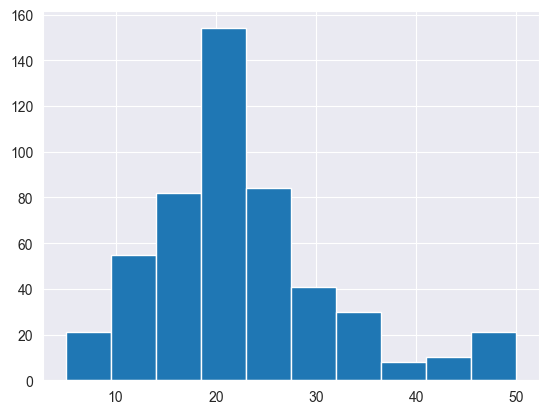

In [7]:
df.medv.hist(bins=10)

Histogram shows normal distribution for prices 0-40k and has a minor edge peak for prices over 40k

## Correlations

<Axes: >

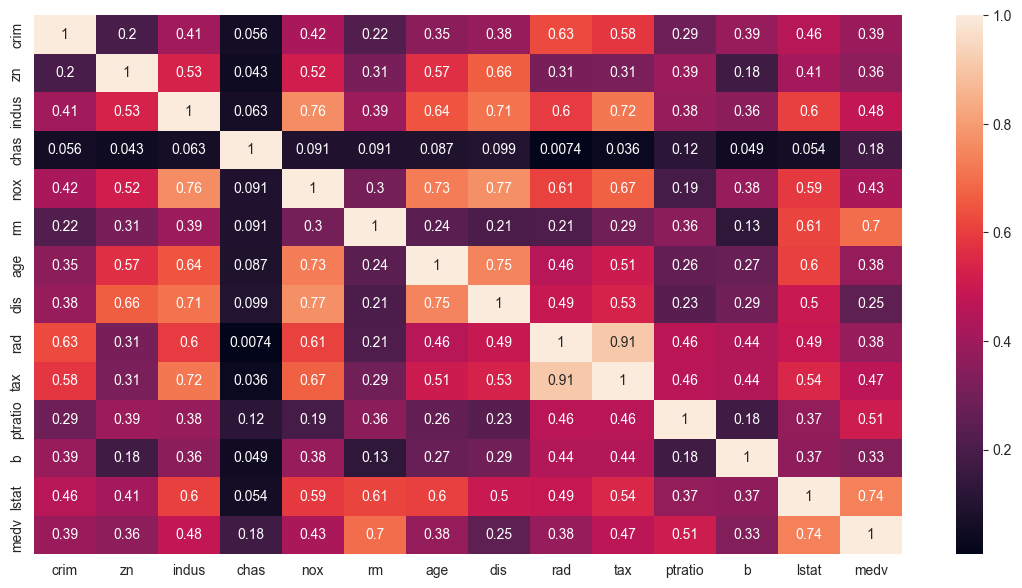

In [8]:
# Correlation matrix
plt.figure(figsize=(14,7))
corr = df.corr().abs()
sns.heatmap(corr, annot=True)

In [9]:
# Since we are interested in median price, check only its correlation with other series and sort
corr.medv.abs().sort_values(ascending=False)

medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64

lstat and rm show the highest level of correlation\
ptration and indus show the moderate level of correlation

## Graphs of given relationships:

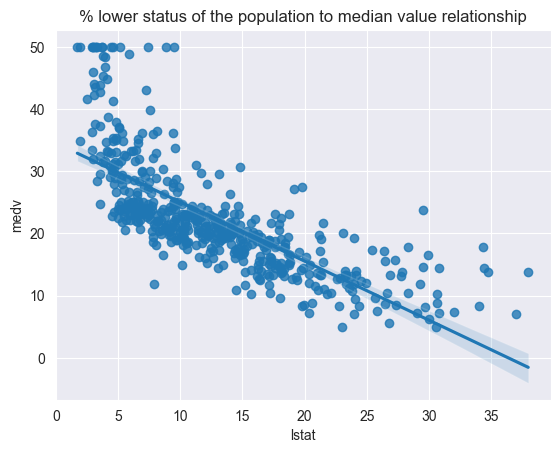

In [10]:
sns.regplot(x='lstat', y='medv', data=df, fit_reg=True)
plt.title('% lower status of the population to median value relationship')
plt.show()

There is a strong relationship between % of lower stats population and median house value. The higher lower stats population, the lower is median house value.

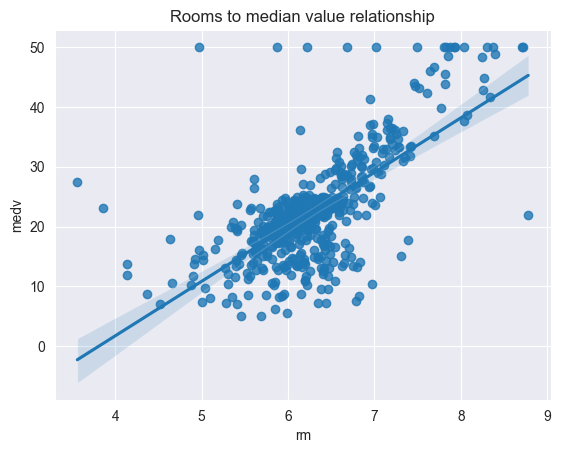

In [11]:
sns.regplot(x='rm', y='medv', data=df, fit_reg=True)
plt.title('Rooms to median value relationship')
plt.show()

There is a strong relationship between number of rooms and median house value. The more rooms, the higher is median house value.

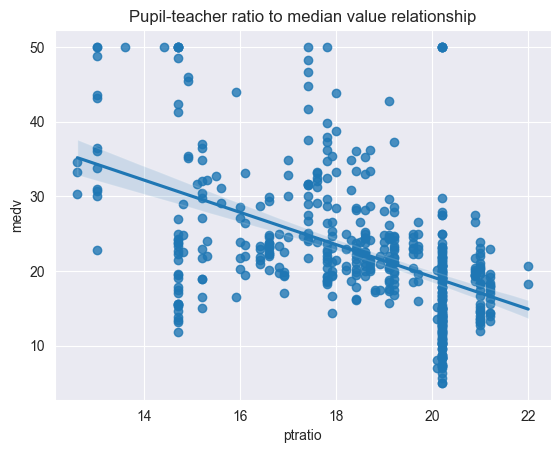

In [12]:
sns.regplot(x='ptratio', y='medv', data=df, fit_reg=True)
plt.title('Pupil-teacher ratio to median value relationship')
plt.show()

There is a moderate relationship between pupil-teacher ratio and median value relationship. The higher the ratio, the lower the price.

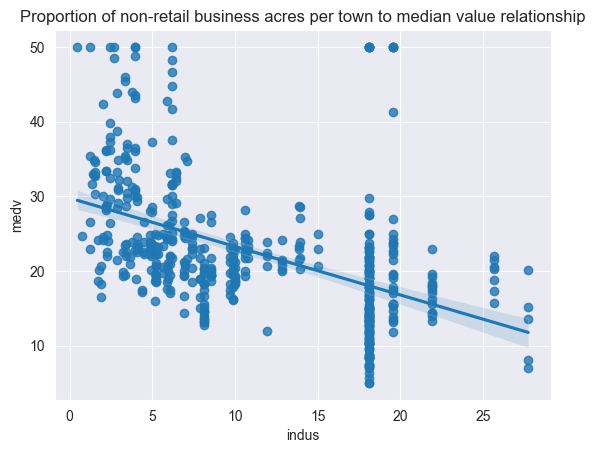

In [13]:
sns.regplot(x='indus', y='medv', data=df, fit_reg=True)
plt.title('Proportion of non-retail business acres per town to median value relationship')
plt.show()

There is a moderate relationship between proportion of non-retail business acres per town and median value relationship. The higher the ratio, the lower the price.

## Conclusions
* House price has a normal distribution with small edge peak for houses over 40k, which is shown on a histogram above<p>
Main factors of house price:
* % lower status of the population (tho higher %, the lower the price)
* Rooms amount (the higher amount, the higher the price)
* Pupil-teacher ratio (the higher the ratio, the lower the price)
* Proportion of non-retail business acres (the higher the proportion, the lower the price)